In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.neighbors import KNeighborsRegressor as KNNreg
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import random

from sklearn.dummy import DummyRegressor

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, Normalizer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import seaborn as sns

%matplotlib notebook

In [2]:
df19 = pd.read_csv("June19_cleaned.csv")
df19.drop("Unnamed: 0", axis=1, inplace=True)
df20 = pd.read_csv("June20_cleaned.csv")
df20.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df19_cols = df19.columns.tolist()
df20_cols = df20.columns.tolist()

m19,n19 = df19.shape
m20,n20 = df20.shape

print("m19: ", m19, "n19: ", n19)
print("m20: ", m20, "n20: ", n20)

m19:  8143 n19:  258
m20:  6942 n20:  256


In [4]:
y_col = "review_scores_rating"
X19_cols = []

for col in df19_cols:
    if y_col != col:
        X19_cols.append(col) 

X20_cols = []
for col in df20_cols:
    if y_col != col:
        X20_cols.append(col) 
        
print(y_col, "is in X19_cols: ", y_col in X19_cols)
print(y_col, "is in X20_cols: ", y_col in X20_cols)

review_scores_rating is in X19_cols:  False
review_scores_rating is in X20_cols:  False


In [5]:
X19 = df19[X19_cols].copy()
y19 = df19[y_col].copy()

X20 = df20[X20_cols].copy()
y20 = df20[y_col].copy()

# Train_test_split

In [6]:
X19_train, X19_test, y19_train, y19_test = train_test_split(X19, y19, test_size=0.2, random_state=42)
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.2, random_state=42)

# 2020

# Rough tune

In [10]:
scaler = StandardScaler()
scoring = 'neg_mean_squared_error'
k_range = np.array(range(1,261,10))
#k_range = np.array(range(1,10))
p_range = np.array(range(1,5))
#p_range = np.array(2**p_powers)

mse_mean_scores_rough = np.zeros([len(k_range), len(p_range)])
mse_std_scores_rough = np.zeros([len(k_range), len(p_range)])

r2_mean_scores_rough = np.zeros([len(k_range), len(p_range)])
r2_std_scores_rough = np.zeros([len(k_range), len(p_range)])

k_cv = 5

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)

mse_dummyscores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring=scoring) 
mse_mean_dummy = np.mean(mse_dummyscores)
mse_std_dummy = np.std(mse_dummyscores)
print("MSE dummy score:",mse_mean_dummy , "+/-", mse_std_dummy)

mse_mean_dummy_array = np.ones(len(k_range))*mse_mean_dummy
mse_std_dummy_array = np.ones(len(k_range))*mse_std_dummy

r2_dummyscores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring='r2') 
r2_mean_dummy = np.mean(r2_dummyscores)
r2_std_dummy = np.std(r2_dummyscores)
print("r2 dummy score:",r2_mean_dummy , "+/-",r2_std_dummy)

r2_mean_dummy_array = np.ones(len(k_range))*r2_mean_dummy
r2_std_dummy_array = np.ones(len(k_range))*r2_std_dummy

scoring = "neg_mean_squared_error"

for i, k in enumerate(k_range):
    for j, p in enumerate(p_range):
        
        print("k:",k)
        print("p:",p)
        model = KNNreg(n_neighbors=k, p=p, weights='distance', metric='minkowski')
        pipesteps = [('scaler', scaler), ('model', model)]
        pipe = Pipeline(pipesteps)
        
        mse_scores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring=scoring) 
        #r2_scores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring='r2') 
        
        print("-mse: ", np.mean(mse_scores), "+/-", np.std(mse_scores))
        #print("-r2: ", np.mean(r2_scores), "+/-", np.std(r2_scores))
        
        mse_mean_scores_rough[i,j] = np.mean(mse_scores)
        mse_std_scores_rough[i,j] = np.std(mse_scores)
        
        #r2_mean_scores[i,j] = np.mean(r2_scores)
        #r2_std_scores[i,j] = np.std(r2_scores)

MSE dummy score: -71.22337964188407 +/- 3.613287571274191
r2 dummy score: -0.001755146268023333 +/- 0.0023117821046268025
k: 1
p: 1
-mse:  -109.74183812975893 +/- 13.077968518838675
k: 1
p: 2
-mse:  -124.30148490524729 +/- 11.079899087268378
k: 1
p: 3
-mse:  -119.11915553717533 +/- 3.7462794351635416
k: 1
p: 4
-mse:  -125.82226741593078 +/- 5.430159453344403
k: 11
p: 1
-mse:  -63.53980329151195 +/- 3.9411072140591625
k: 11
p: 2
-mse:  -64.67798544756874 +/- 3.3794715776655475
k: 11
p: 3
-mse:  -65.95137788987404 +/- 3.6116774662437496
k: 11
p: 4
-mse:  -66.62840075314533 +/- 2.587022407656377
k: 21
p: 1
-mse:  -61.55971251394003 +/- 3.368643591198897
k: 21
p: 2
-mse:  -62.48183521319329 +/- 3.438563547917889
k: 21
p: 3
-mse:  -63.427187666314104 +/- 2.9368393449970127
k: 21
p: 4
-mse:  -64.70816270012506 +/- 2.9244230292873157
k: 31
p: 1
-mse:  -60.85054240479199 +/- 3.4597162741602565
k: 31
p: 2
-mse:  -61.609358368299965 +/- 3.5301513826520274
k: 31
p: 3
-mse:  -62.52180839056607 +/-

In [43]:
scaler = StandardScaler()
scoring = 'neg_mean_squared_error'
k_range = np.array(range(1,261,10))
#k_range = np.array(range(1,10))
p_range = np.array(range(1,5))
#p_range = np.array(2**p_powers)

mse_scores_rough_test = np.zeros([len(k_range), len(p_range)])

k_cv = 5

dummy_model = DummyRegressor(strategy='mean')
pipesteps = [('scaler', scaler), ('model', dummy_model)]
pipe = Pipeline(pipesteps)

scoring = "neg_mean_squared_error"

for i, k in enumerate(k_range):
    for j, p in enumerate(p_range):
        
        print("k:",k)
        print("p:",p)
        model = KNNreg(n_neighbors=k, p=p, weights='distance', metric='minkowski')
        pipesteps = [('scaler', scaler), ('model', model)]
        pipe = Pipeline(pipesteps)
        
        pipe.fit(X20_train, y20_train)
        y20_pred = pipe.predict(X20_test)
        mse_score_test = -mean_squared_error(y20_test, y20_pred)
        
        print("-mse test score: ", mse_score_test)
        
        mse_scores_rough_test[i, j] = mse_score_test

k: 1
p: 1
-mse test score:  -109.91648668106552
k: 1
p: 2
-mse test score:  -117.59899208063355
k: 1
p: 3
-mse test score:  -120.90640748740101
k: 1
p: 4
-mse test score:  -119.53275737940965
k: 11
p: 1
-mse test score:  -67.89440268387433
k: 11
p: 2
-mse test score:  -69.1679552459817
k: 11
p: 3
-mse test score:  -71.14625234776071
k: 11
p: 4
-mse test score:  -72.54136734962539
k: 21
p: 1
-mse test score:  -65.57688866761934
k: 21
p: 2
-mse test score:  -67.3805438907313
k: 21
p: 3
-mse test score:  -69.39229116842766
k: 21
p: 4
-mse test score:  -69.68745735350201
k: 31
p: 1
-mse test score:  -65.04264247694948
k: 31
p: 2
-mse test score:  -66.4775996687387
k: 31
p: 3
-mse test score:  -68.35968512196354
k: 31
p: 4
-mse test score:  -69.6035321587053
k: 41
p: 1
-mse test score:  -65.32440460525756
k: 41
p: 2
-mse test score:  -65.70980441816026
k: 41
p: 3
-mse test score:  -67.83092696792967
k: 41
p: 4
-mse test score:  -69.18853419309465
k: 51
p: 1
-mse test score:  -65.70478121558

<IPython.core.display.Javascript object>


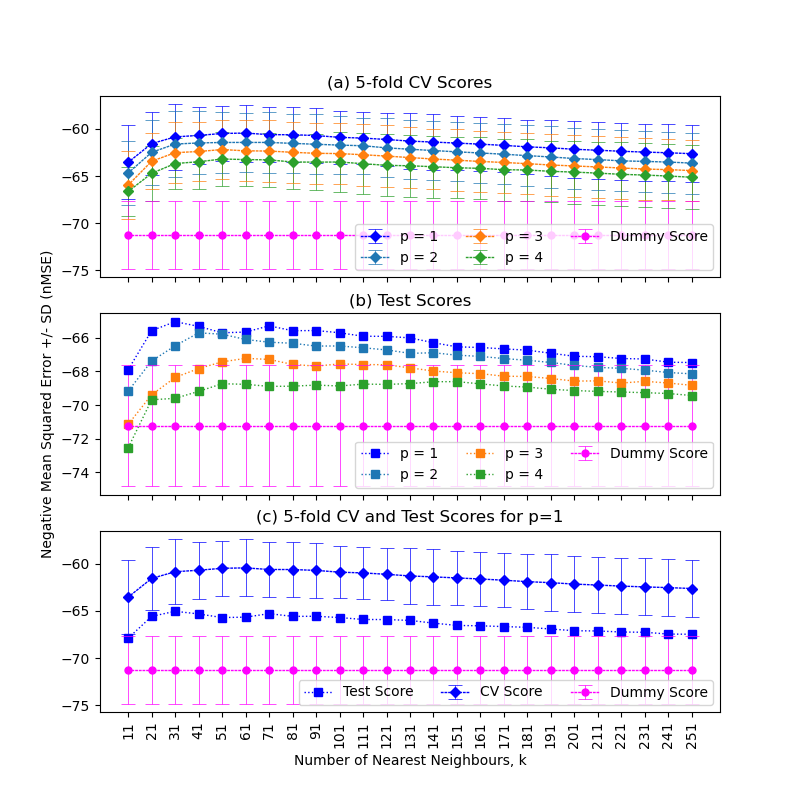

In [91]:
k_range = np.array(range(1,261,10))

mse_mean_dummy = np.mean(mse_dummyscores)
mse_std_dummy = np.std(mse_dummyscores)

mse_mean_dummy_array = np.ones(len(k_range))*mse_mean_dummy
mse_std_dummy_array = np.ones(len(k_range))*mse_std_dummy

start = 1
stop = len(k_range)

fig = plt.figure()
ax0 = fig.add_subplot(312)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
test_ms = 6
test_marker="s"
dummy_marker = "o"
dummy_ms = 5
dummy_colour = "magenta"

p1_colour = "blue"

linestyle=":"
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,0], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, color=p1_colour, label="p = 1")
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,1], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, label="p = 2")
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,2], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, label="p = 3")
ax0.plot(k_range[start:stop], mse_scores_rough_test[start:stop,3], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth, label="p = 4")
ax0.errorbar(k_range[start:stop], mse_mean_dummy_array[start:stop], mse_std_dummy_array[start:stop], color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax0.legend()
ax0.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
#ax0.set_xlabel("Number of Nearest Neighbours, k")
ax0.set_title("(b) Test Scores")
ax0.set_xticks(np.array(range(11,261,10)))
ax0.set_xticklabels([])
ax0.legend(loc="lower right", ncol=3)

ax1 = fig.add_subplot(311)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
CV_ms = 5
CV_marker="D"
linestyle=":"
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,0], mse_std_scores_rough[start:stop,0], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, color=p1_colour,  label="p = 1")
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,1], mse_std_scores_rough[start:stop,1],linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 2")
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,2], mse_std_scores_rough[start:stop,2], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 3")
ax1.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,3], mse_std_scores_rough[start:stop,3], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="p = 4")
ax1.errorbar(k_range[start:stop], mse_mean_dummy_array[start:stop], mse_std_dummy_array[start:stop], color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax1.legend()
#ax1.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
#ax1.set_xlabel("Number of Nearest Neighbours, k")
ax1.set_title("(a) 5-fold CV Scores")
ax1.set_xticks(np.array(range(11,261,10)))
ax1.set_xticklabels([])
ax1.legend(loc="lower right", ncol=3)

ax2 = fig.add_subplot(313)
capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
linestyle=":"
zoom_start = 3
zoom_stop = 9
ax2.errorbar(k_range[start:stop], mse_mean_scores_rough[start:stop,0], mse_std_scores_rough[start:stop,0], linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth,color=p1_colour , label="CV Score")
ax2.plot(k_range[start:stop], mse_scores_rough_test[start:stop,0], linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth,color=p1_colour, label="Test Score")
ax2.errorbar(k_range[start:stop], mse_mean_dummy_array[start:stop], mse_std_dummy_array[start:stop], color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")
ax2.set_xlabel("Number of Nearest Neighbours, k")
ax2.set_title("(c) 5-fold CV and Test Scores for p=1")
ax2.set_xticks(k_range[zoom_start:zoom_stop])
ax2.set_xticks(np.array(range(11,261,10)))
ax2.set_xticklabels(list(map(str,np.array(range(11,261,10)))), rotation=90)
ax2.legend(loc="lower right", ncol=3)
fig.set_size_inches([8,8])
#fig.tight_layout()

# Fine Tune

In [92]:
scaler = StandardScaler()
k_range = np.array(range(21,41))

mse_mean_scores_fine = np.zeros([len(k_range)])
mse_std_scores_fine = np.zeros([len(k_range)])

mse_scores_test = np.zeros([len(k_range)])
r2_scores_test = np.zeros([len(k_range)])

k_cv = 5
p=1
scoring = "neg_mean_squared_error"

for i, k in enumerate(k_range):
        
        print("k:",k)
        model = KNNreg(n_neighbors=k, p=p, weights='distance', metric='minkowski')
        pipesteps = [('scaler', scaler), ('model', model)]
        pipe = Pipeline(pipesteps)
        mse_scores = cross_val_score(pipe, X20_train, y20_train, cv=k_cv, scoring=scoring) 
        
        print("-mse: ", np.mean(mse_scores), "+/-", np.std(mse_scores))
        
        mse_mean_scores_fine[i] = np.mean(mse_scores)
        mse_std_scores_fine[i] = np.std(mse_scores)
        
        pipe.fit(X20_train, y20_train)
        y20_pred = pipe.predict(X20_test)
        mse_score_test = -mean_squared_error(y20_test, y20_pred)
        r2_score_test = metrics.r2_score(y20_test, y20_pred)
        
        print("-mse test score: ", mse_score_test)
        print("r2 test score: ", r2_score_test)
        
        mse_scores_test[i] = mse_score_test
        r2_scores_test[i] = r2_score_test

k: 21
-mse:  -61.55971251394003 +/- 3.368643591198897
-mse test score:  -65.57688866761934
r2 test score:  0.12410804628807737
k: 22
-mse:  -61.58157202364298 +/- 3.2892124738537176
-mse test score:  -65.01151799827949
r2 test score:  0.13165954240509326
k: 23
-mse:  -61.40405533889852 +/- 3.184515280850268
-mse test score:  -64.89414710434856
r2 test score:  0.1332272322373318
k: 24
-mse:  -61.2559174013099 +/- 3.17872417673891
-mse test score:  -65.04372425553989
r2 test score:  0.13122937253630695
k: 25
-mse:  -61.054060062550626 +/- 3.338873148473131
-mse test score:  -65.14528860929501
r2 test score:  0.12987280619036512
k: 26
-mse:  -61.05313055061756 +/- 3.369121267093774
-mse test score:  -65.17418629591303
r2 test score:  0.12948682796383004
k: 27
-mse:  -61.06726497717666 +/- 3.388326395870541
-mse test score:  -65.1694183651327
r2 test score:  0.12955051186666833
k: 28
-mse:  -61.067604690429434 +/- 3.3892123347931693
-mse test score:  -65.09023251315853
r2 test score:  0.13

<IPython.core.display.Javascript object>


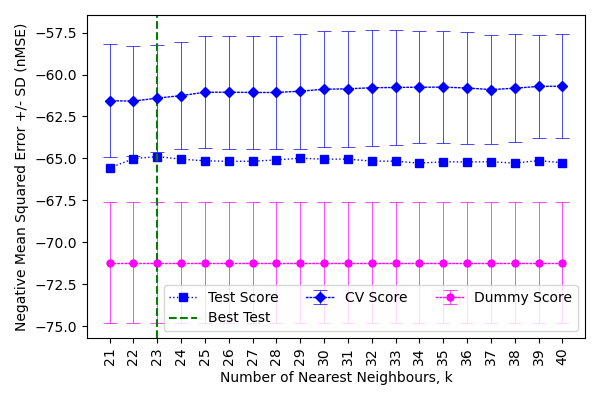

In [113]:
k_range = np.array(range(21,41))
mse_mean_dummy_array = np.ones(len(k_range))*mse_mean_dummy
mse_std_dummy_array = np.ones(len(k_range))*mse_std_dummy

fig = plt.figure()

ax3 = fig.add_subplot(111)

capsize = 5
capthick = 0.5
elinewidth = 0.5
linewidth = 1
linestyle=":"
zoom_start = 3
zoom_stop = 9

ax3.errorbar(k_range, mse_mean_scores_fine, mse_std_scores_fine, linestyle=linestyle,marker=CV_marker, ms=CV_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth,color=p1_colour , label="CV Score")

ax3.plot(k_range, mse_scores_test, linestyle=linestyle,marker=test_marker, ms=test_ms, linewidth=linewidth,color=p1_colour, label="Test Score")

ax3.errorbar(k_range, mse_mean_dummy_array, mse_std_dummy_array, color=dummy_colour, linestyle=linestyle,marker=dummy_marker, ms=dummy_ms, linewidth=linewidth, dash_capstyle="projecting",capsize = capsize,capthick=capthick, elinewidth=elinewidth, label="Dummy Score")

ax3.set_xlabel("Number of Nearest Neighbours, k")
ax3.set_xticks(np.array(range(21,41)))
ax3.set_xticklabels(list(map(str,np.array(range(21,41)))), rotation=90)
ax3.set_ylabel("Negative Mean Squared Error +/- SD (nMSE)")
max_cv_ix = np.argmax(mse_mean_scores_fine)
#ax1.axhline(mse_mean_scores_fine[max_cv_ix], linestyle='--',color="green", label="Best CV")
#ax3.axvline(k_range[max_cv_ix], linestyle='--', color="red", label="Best CV")

max_test_ix = np.argmax(mse_scores_test)
#ax1.axhline(mse_scores_test[max_test_ix], linestyle='--',color="magenta", label="Best Test")
ax3.axvline(k_range[max_test_ix], linestyle='--', color="green", label="Best Test")

ax3.legend(loc="lower right", ncol=3)

fig.set_size_inches([6,4])
fig.tight_layout()

In [114]:
model = KNNreg(n_neighbors=23, p=1, weights='distance')
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X20_train, y20_train)
y20_pred = pipe.predict(X20_test)
mse_score = mean_squared_error(y20_test, y20_pred)
r2_score = metrics.r2_score(y20_test, y20_pred)

print(mse_score)
print(r2_score)

64.89414710434856
0.1332272322373318


In [115]:
model = KNNreg(n_neighbors=23, weights='distance')
pipesteps = [('scaler', scaler), ('model', model)]
pipe = Pipeline(pipesteps)

pipe.fit(X20_train, y20_train)
full_pred = pipe.predict(X20_test)
full_mse_score = -mean_squared_error(y20_test, y20_pred)
#full_r2_score = metrics.r2_score(y20_test, y20_pred)

print(full_mse_score)
#print(full_r2_score)

cols_array = []
mean_mse_drop_array = []
std_mse_drop_array = []
#mean_r2_drop_array = []
#std_r2_drop_array = []

for col in X20_cols:
    print("\n----------------------------\n")
    print("col: ", col)
    cols_array.append(col)
    mse_drop_perms = []
    #r2_drop_perms =[]
    
    for perm in range(5):
        temp_array = X20_test[col]
        temp_array = np.random.permutation(temp_array)
        temp_df = X20_test.copy()
        temp_df[col] = temp_array

        y20_pred = pipe.predict(temp_df)
        mse_score = -mean_squared_error(y20_test, y20_pred)
        #r2_score = metrics.r2_score(y20_test, y20_pred) 

        #print("All scores:", scores)
        #print("mean score:", np.mean(scores))
        #print("std  score:", np.std(scores))
        
        mse_drop_perms.append(full_mse_score - mse_score)
        #r2_drop_perms.append(full_r2_score - r2_score)
    
    mean_mse_drop = np.mean(mse_drop_perms)
    std_mse_drop = np.std(mse_drop_perms)
    
    #mean_r2_drop = np.mean(r2_drop_perms)
    #std_r2_drop = np.std(r2_drop_perms)
    
    mean_mse_drop_array.append(mean_mse_drop)
    std_mse_drop_array.append(std_mse_drop)
    
    #mean_r2_drop_array.append(mean_r2_drop)
    #std_r2_drop_array.append(std_r2_drop)
    
    print("mse drop: ", mean_mse_drop, "+/", std_mse_drop)
    #print("r2 drop: ", mean_r2_drop, "+/", std_r2_drop)

-64.89414710434856

----------------------------

col:  host_is_superhost
mse drop:  3.077716863744024 +/ 0.32003741738772445

----------------------------

col:  host_listings_count
mse drop:  1.8501322906508961 +/ 0.10180068902856361

----------------------------

col:  host_total_listings_count
mse drop:  1.818407393988616 +/ 0.10768905738451594

----------------------------

col:  host_has_profile_pic
mse drop:  2.6152009873024697 +/ 0.11597077556350534

----------------------------

col:  host_identity_verified
mse drop:  2.126985466892384 +/ 0.3372345634620909

----------------------------

col:  is_location_exact
mse drop:  1.444372793743065 +/ 0.38368113271133103

----------------------------

col:  accommodates
mse drop:  2.0874898911496502 +/ 0.38363938353842736

----------------------------

col:  bathrooms
mse drop:  2.510243821357372 +/ 0.1543359239428531

----------------------------

col:  bedrooms
mse drop:  2.107106286847852 +/ 0.22098905199434118

--------------------

mse drop:  2.526085599697663 +/ 0.1053476920806257

----------------------------

col:  amenities_Doorman
mse drop:  2.648907358975839 +/ 0.14923972478154277

----------------------------

col:  amenities_Double oven
mse drop:  2.571175680022179 +/ 0.0

----------------------------

col:  amenities_Dryer
mse drop:  2.2384310070877005 +/ 0.2227665181084074

----------------------------

col:  amenities_EV charger
mse drop:  2.6152593935840374 +/ 0.04498002983225712

----------------------------

col:  amenities_Electric profiling bed
mse drop:  2.571175680022179 +/ 0.0

----------------------------

col:  amenities_Elevator
mse drop:  2.0714449812406626 +/ 0.22729028589147354

----------------------------

col:  amenities_En suite bathroom
mse drop:  2.5709344913522187 +/ 0.0024862640071826644

----------------------------

col:  amenities_Espresso machine
mse drop:  2.561589504975109 +/ 0.019694140528833504

----------------------------

col:  amenities_Essentials
mse drop:  2.75150047

mse drop:  2.5469736323289682 +/ 0.07972439287655068

----------------------------

col:  amenities_Private bathroom
mse drop:  2.5707852607970523 +/ 0.0009021430657731022

----------------------------

col:  amenities_Private entrance
mse drop:  1.8457488998503748 +/ 0.23596030660963604

----------------------------

col:  amenities_Private living room
mse drop:  2.328343040778023 +/ 0.21516459786489575

----------------------------

col:  amenities_Rain shower
mse drop:  2.571495055903591 +/ 9.22788502963617e-05

----------------------------

col:  amenities_Refrigerator
mse drop:  1.9853799037324875 +/ 0.16693687367649268

----------------------------

col:  amenities_Roll-in shower
mse drop:  2.571175680022179 +/ 0.0

----------------------------

col:  amenities_Room-darkening shades
mse drop:  2.5938793502978057 +/ 0.025566647734063468

----------------------------

col:  amenities_Safety card
mse drop:  2.401584729778443 +/ 0.2611913833633176

----------------------------

col: 

mse drop:  2.493906775909443 +/ 0.04208915031173557

----------------------------

col:  property_type_Castle
mse drop:  2.571175680022179 +/ 0.0

----------------------------

col:  property_type_Chalet
mse drop:  2.571175680022179 +/ 0.0

----------------------------

col:  property_type_Condominium
mse drop:  2.540832915594481 +/ 0.05674763540796864

----------------------------

col:  property_type_Cottage
mse drop:  2.5563046090189827 +/ 0.07251739892452225

----------------------------

col:  property_type_Farm stay
mse drop:  2.5731816925602344 +/ 0.0040142049908664925

----------------------------

col:  property_type_Guest suite
mse drop:  2.5457617925898774 +/ 0.10596860573739769

----------------------------

col:  property_type_Guesthouse
mse drop:  2.596406619187627 +/ 0.07693630459456906

----------------------------

col:  property_type_Hostel
mse drop:  2.4508724156601973 +/ 0.34466198101594653

----------------------------

col:  property_type_Hotel
mse drop:  2.596031

<IPython.core.display.Javascript object>


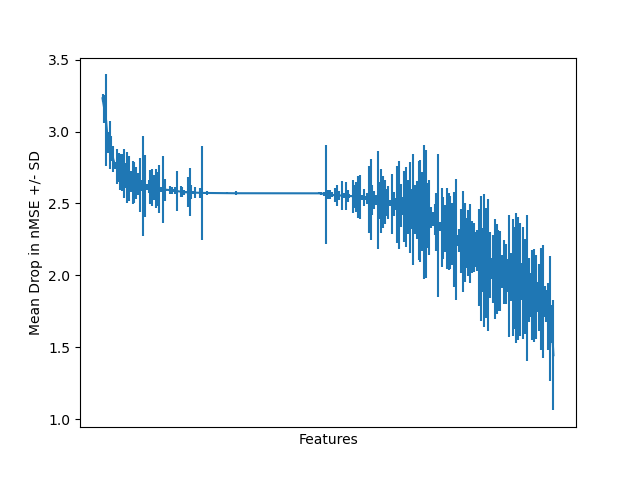

<IPython.core.display.Javascript object>


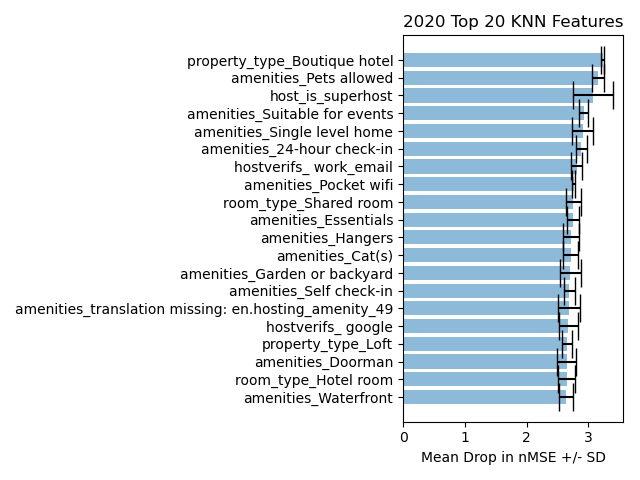

<IPython.core.display.Javascript object>


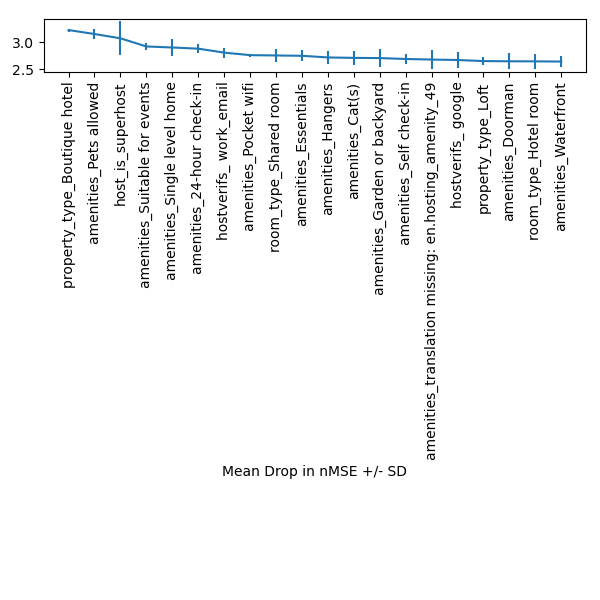

In [118]:
drop_df = pd.DataFrame(mean_mse_drop_array, columns=["mean_mse_drop"])
drop_df["features"] = X20_cols
drop_df["std_mse_drop"] = std_mse_drop_array

drop_df.sort_values(by='mean_mse_drop', ascending=False, inplace=True)

num_features = 20

fig = plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(drop_df.features, drop_df.mean_mse_drop, drop_df.std_mse_drop)
ax.set_xticks([]);
ax.set_xticklabels([]);
ax.set_ylabel("Mean Drop in nMSE +/- SD")
ax.set_xlabel("Features")

fig = plt.figure()
ax=fig.add_subplot(111)
ax.barh(np.flipud(drop_df.features[0:num_features].values),np.flipud(drop_df.mean_mse_drop[0:num_features]), xerr=np.flipud(drop_df.std_mse_drop[0:num_features]), align='center', alpha=0.5, ecolor='black', capsize=10)
#ax.set_xticklabels([]);
ax.set_xlabel("Mean Drop in nMSE +/- SD")
#ax.set_xlabel("Features")
ax.set_title("2020 Top 20 KNN Features")
plt.tight_layout()

fig = plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(drop_df.features[0:num_features],drop_df.mean_mse_drop[0:num_features], drop_df.std_mse_drop[0:num_features])
ax.set_xticklabels(drop_df.features[0:num_features], rotation=90);
ax.set_xlabel("Mean Drop in nMSE +/- SD")
#ax.set_xlabel("Features")
plt.tight_layout()
#ax.set_ylim([0,2])
fig.set_size_inches([6,6])



# good_features = drop_df[drop_df.r2_change < 0].copy()

# fig = plt.figure()
# ax=fig.add_subplot(111)
# ax.plot(good_features.features, good_features.r2_change)
# ax.set_xticklabels(good_features.features, rotation=90);

# plt.tight_layout()